In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('./rental_house_base_utf8bom.csv')

In [2]:
df.head(100)

,id,賃料,区名,最寄駅徒歩分数,最寄路線名,最寄駅名,間取り,築総月数,方角,面積数字,...,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,駐車場,周辺環境,建物構造
0,1,75000,北区,4,都営三田線,西巣鴨駅,1K,117,南東,20.01,...,1,1,0,1,1,0,0,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）
1,2,76000,中央区,5,都営大江戸線,勝どき駅,1R,538,NaN,16.50,...,1,1,0,1,1,0,0,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造
2,3,110000,渋谷区,6,京王線,笹塚駅,1K,102,南,22.05,...,1,1,0,1,1,0,0,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）
3,4,150000,杉並区,3,丸ノ内線(池袋－荻窪),新高円寺駅,2LDK,352,南,60.48,...,1,1,0,1,0,0,0,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）
4,5,74000,葛飾区,5,京成金町線,京成金町駅,2DK,379,南,39.66,...,0,1,0,0,0,0,0,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,49000,中野区,6,丸ノ内線(中野坂上－方南町),方南町駅,1R,193,南,14.07,...,1,1,0,0,1,0,0,駐輪場\t空有\t0円,【大学】 1439m\t【飲食店】 149m\t【飲食店】 326m\t【飲食店】 354m...,木造
96,97,118000,墨田区,7,京成押上線,八広駅,1LDK,63,東,40.55,...,1,1,0,1,0,0,0,NaN,NaN,RC（鉄筋コンクリート）
97,98,124000,千代田区,4,都営新宿線,神保町駅,1K,214,南,28.11,...,1,1,0,1,1,0,0,駐輪場\t空有\tバイク置き場\t無,【コンビニ】 2752m\t【コンビニ】 2694m\t【スーパー】 2862m,SRC（鉄骨鉄筋コンクリート）
98,99,127000,江東区,3,都営新宿線,東大島駅,3LDK,392,東,59.33,...,1,1,0,1,0,0,0,"駐車場\t空有(1台)\t17,000円\t距離0m",NaN,SRC（鉄骨鉄筋コンクリート）


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31323 entries, 0 to 31322
Data columns (total 80 columns):
id                 31323 non-null int64
賃料                 31323 non-null int64
区名                 31323 non-null object
最寄駅徒歩分数            31323 non-null int64
最寄路線名              31323 non-null object
最寄駅名               31323 non-null object
間取り                31323 non-null object
築総月数               31323 non-null int64
方角                 28593 non-null object
面積数字               31323 non-null float64
何階建数字              31323 non-null int64
所在階数字（含地下）         31323 non-null int64
シャワー               31323 non-null int64
温水洗浄便座             31323 non-null int64
洗面台独立              31323 non-null int64
脱衣所                31323 non-null int64
追焚機能               31323 non-null int64
浴室乾燥機              31323 non-null int64
バス・トイレ別            31323 non-null int64
バスなし               31323 non-null int64
専用トイレ              31323 non-null int64
共同トイレ              31323 non-null int64
共同バス

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.get_dummies(df, columns=['区名', '最寄路線名', '最寄駅名', '間取り', '方角', '建物構造'])

In [6]:
df = df.drop(['駐車場', '周辺環境'], axis=1)

In [7]:
df

,id,賃料,最寄駅徒歩分数,築総月数,面積数字,何階建数字,所在階数字（含地下）,シャワー,温水洗浄便座,洗面台独立,脱衣所,追焚機能,浴室乾燥機,バス・トイレ別,バスなし,専用トイレ,共同トイレ,共同バス,IHコンロ,ガスコンロ,電気コンロ,コンロ1口,コンロ2口,コンロ3口,コンロ4口以上,コンロ設置可（コンロ1口）,コンロ設置可（コンロ2口）,コンロ設置可（コンロ3口）,コンロ設置可（コンロ4口以上）,コンロ設置可（口数不明）,独立キッチン,システムキッチン,カウンターキッチン,L字キッチン,給湯,冷蔵庫あり,BSアンテナ,CSアンテナ,CATV,有線放送,インターネット対応,インターネット使用料無料,光ファイバー,高速インターネット,Unnamed: 49,24時間換気システム,エアコン付,オール電化,床暖房,2面採光,3面採光,ペアガラス,防音室,出窓,下水,公営水道,室内洗濯機置場,室外洗濯機置場,洗濯機置場なし,プロパンガス,都市ガス,クッションフロア,タイル張り,フローリング,ウォークインクローゼット,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,区名_世田谷区,区名_中央区,区名_中野区,区名_北区,区名_千代田区,区名_台東区,区名_品川区,区名_墨田区,区名_大田区,区名_文京区,区名_新宿区,区名_杉並区,区名_板橋区,区名_江戸川区,区名_江東区,区名_渋谷区,区名_港区,区名_目黒区,区名_練馬区,区名_荒川区,区名_葛飾区,区名_豊島区,区名_足立区,最寄路線名_つくばエクスプレス,最寄路線名_ゆりかもめ,最寄路線名_りんかい線,最寄路線名_中央線（快速）,最寄路線名_丸ノ内線(中野坂上－方南町),最寄路線名_丸ノ内線(池袋－荻窪),最寄路線名_京急本線,最寄路線名_京急空港線,最寄路線名_京成成田空港線,最寄路線名_京成押上線,最寄路線名_京成本線,最寄路線名_京成金町線,最寄路線名_京浜東北線,最寄路線名_京王井の頭線,最寄路線名_京王新線,最寄路線名_京王線,最寄路線名_京葉線(東京－蘇我),最寄路線名_副都心線,最寄路線名_北総線,最寄路線名_千代田線,最寄路線名_半蔵門線,最寄路線名_南北線,最寄路線名_埼京線,最寄路線名_埼玉高速鉄道線,最寄路線名_小田急小田原線,最寄路線名_山手線,最寄路線名_常磐線,最寄路線名_常磐線快速,最寄路線名_日暮里・舎人ライナー,最寄路線名_日比谷線,最寄路線名_有楽町線,最寄路線名_東京モノレール羽田線,最寄路線名_東北本線（宇都宮線）,最寄路線名_東急世田谷線,最寄路線名_東急多摩川線,最寄路線名_東急大井町線,最寄路線名_東急東横線,最寄路線名_東急池上線,最寄路線名_東急田園都市線,最寄路線名_東急目黒線,最寄路線名_東武スカイツリーライン,最寄路線名_東武亀戸線,最寄路線名_東武伊勢崎線(押上－曳舟),最寄路線名_東武大師線,最寄路線名_東武東上線,最寄路線名_東海道新幹線,最寄路線名_東海道本線,最寄路線名_東西線,最寄路線名_横須賀線,最寄路線名_湘南新宿ライン(高崎線－東海道本線),最寄路線名_総武本線,最寄路線名_総武線・中央線（各停）,最寄路線名_西武新宿線,最寄路線名_西武有楽町線,最寄路線名_西武池袋線,最寄路線名_西武豊島線,最寄路線名_都営三田線,最寄路線名_都営大江戸線,最寄路線名_都営新宿線,最寄路線名_都営浅草線,最寄路線名_都電荒川線,最寄路線名_銀座線,最寄路線名_高崎線,最寄駅名_お台場海浜公園駅,最寄駅名_お花茶屋駅,最寄駅名_とうきょうスカイツリー駅,最寄駅名_ときわ台(東京都)駅,最寄駅名_一之江駅,最寄駅名_三ノ輪橋駅,最寄駅名_三ノ輪駅,最寄駅名_三河島駅,最寄駅名_三田(東京都)駅,最寄駅名_三越前駅,最寄駅名_三軒茶屋駅,最寄駅名_三鷹台駅,最寄駅名_上中里駅,最寄駅名_上井草駅,最寄駅名_上北沢駅,最寄駅名_上板橋駅,最寄駅名_上町駅,最寄駅名_上石神井駅,最寄駅名_上野広小路駅,最寄駅名_上野毛駅,最寄駅名_上野駅,最寄駅名_下丸子駅,最寄駅名_下井草駅,最寄駅名_下北沢駅,最寄駅名_下板橋駅,最寄駅名_下神明駅,最寄駅名_下落合駅,最寄駅名_下赤塚駅,最寄駅名_下高井戸駅,最寄駅名_不動前駅,最寄駅名_世田谷代田駅,最寄駅名_世田谷駅,最寄駅名_両国(都営線)駅,最寄駅名_両国駅,最寄駅名_中井駅,最寄駅名_中延駅,最寄駅名_中村橋駅,最寄駅名_中板橋駅,最寄駅名_中目黒駅,最寄駅名_中野(東京都)駅,最寄駅名_中野坂上駅,最寄駅名_中野富士見町駅,最寄駅名_中野新橋駅,最寄駅名_乃木坂駅,最寄駅名_久が原駅,最寄駅名_久我山駅,最寄駅名_九品仏駅,最寄駅名_九段下駅,最寄駅名_亀戸水神駅,最寄駅名_亀戸駅,最寄駅名_亀有駅,最寄駅名_二子玉川駅,最寄駅名_五反田駅,最寄駅名_五反野駅,最寄駅名_井荻駅,最寄駅名_京急蒲田駅,最寄駅名_京成上野駅,最寄駅名_京成小岩駅,最寄駅名_京成曳舟駅,最寄駅名_京成立石駅,最寄駅名_京成金町駅,最寄駅名_京成関屋駅,最寄駅名_京成高砂駅,最寄駅名_京橋(東京都)駅,最寄駅名_人形町駅,最寄駅名_仙川駅,最寄駅名_代々木上原駅,最寄駅名_代々木八幡駅,最寄駅名_代々木公園駅,最寄駅名_代々木駅,最寄駅名_代官山駅,最寄駅名_代田橋駅,最寄駅名_仲御徒町駅,最寄駅名_住吉(東京都)駅,最寄駅名_保谷駅,最寄駅名_信濃町駅,最寄駅名_光が丘駅,最寄駅名_入谷(東京都)駅,最寄駅名_八丁堀(東京都)駅,最寄駅名_八幡山駅,最寄駅名_八広駅,最寄駅名_八潮駅,最寄駅名_六本木一丁目駅,最寄駅名_六本木駅,最寄駅名_六町駅,最寄駅名_六郷土手駅,最寄駅名_内幸町駅,最寄駅名_初台駅,最寄駅名_勝どき駅,最寄駅名_北千住駅,最寄駅名_北千束駅,最寄駅名_北参道駅,...,最寄駅名_梅ケ丘駅,最寄駅名_梅屋敷(東京都)駅,最寄駅名_梅島駅,最寄駅名_梶原駅,最寄駅名_森下(東京都)駅,最寄駅名_椎名町駅,最寄駅名_武蔵小山駅,最寄駅名_武蔵新田駅,最寄駅名_武蔵関駅,最寄駅名_水天宮前駅,最寄駅名_水道橋駅,最寄駅名_氷川台駅,最寄駅名_永田町駅,最寄駅名_永福町駅,最寄駅名_汐留駅,最寄駅名_江北駅,最寄駅名_江古田駅,最寄駅名_江戸川橋駅,最寄駅名_江戸川駅,最寄駅名_池ノ上駅,最寄駅名_池上駅,最寄駅名_池尻大橋駅,最寄駅名_池袋駅,最寄駅名_沼袋駅,最寄駅名_沼部駅,最寄駅名_泉岳寺駅,最寄駅名_洗足池駅,最寄駅名_洗足駅,最寄駅名_浅草(ＴＸ)駅,最寄駅名_浅草橋駅,最寄駅名_浅草駅,最寄駅名_浜松町駅,最寄駅名_浜田山駅,最寄駅名_浜町駅,最寄駅名_浦安(千葉県)駅,最寄駅名_浮間舟渡駅,最寄駅名_淡路町駅,最寄駅名_清澄白河駅,最寄駅名_渋谷駅,最寄駅名_湯島駅,最寄駅名_溜池山王駅,最寄駅名_滝野川一丁目駅,最寄駅名_潮見駅,最寄駅名_熊野前(舎人ライナー)駅,最寄駅名_熊野前駅,最寄駅名_牛田(東京都)駅,最寄駅名_牛込柳町駅,最寄駅名_牛込神楽坂駅,最寄駅名_王子神谷駅,最寄駅名_王子駅,最寄駅名_王子駅前駅,最寄駅名_瑞江駅,最寄駅名_用賀駅,最寄駅名_田原町(東京都)駅,最寄駅名_田園調布駅,最寄駅名_田町(東京都)駅,最寄駅名_田端駅,最寄駅名_町屋(京成線)駅,最寄駅名_町屋(東京メトロ)駅,最寄駅名_町屋二丁目駅,最寄駅名_町屋駅前駅,最寄駅名_白山(東京都)駅,最寄駅名_白金台駅,最寄駅名_白金高輪駅,最寄駅名_目白駅,最寄駅名_目黒駅,最寄駅名_矢口渡駅,最寄駅名_石川台駅,最寄駅名_石神井公園駅,最寄駅名_祐天寺駅,最寄駅名_祖師ケ谷大蔵駅,最寄駅名_神保町駅,最寄駅名_神楽坂駅,最寄駅名_神泉駅,最寄駅名_神田(東京都)駅,最寄駅名_神谷町駅,最寄駅名_秋葉原駅,最寄駅名_稲荷町(東京都)駅,最寄駅名_穴守稲荷駅,最寄駅名_立会川駅,最寄駅名_竹ノ塚駅,最寄駅名_竹橋駅,最寄駅名_笹塚駅,最寄駅名_等々力駅,最寄駅名_築地市場駅,最寄駅名_築地駅,最寄駅名_篠崎駅,最寄駅名_糀谷駅,最寄駅名_経堂駅,最寄駅名_綾瀬駅,最寄駅名_緑が丘(東京都)駅,最寄駅名_練馬春日町駅,最寄駅名_練馬駅,最寄駅名_練馬高野台駅,最寄駅名_自由が丘駅,最寄駅名_舎人公園駅,最寄駅名_舎人駅,最寄駅名_舞浜駅,最寄駅名_船堀駅,最寄駅名_芝公園駅,最寄駅名_芝浦ふ頭駅,最寄駅名_芦花公園駅,最寄駅名_若松河田駅,最寄駅名_若林(東京都)駅,最寄駅名_茅場町駅,最寄駅名_茗荷谷駅,最寄駅名_荏原中延駅,最寄駅名_荏原町駅,最寄駅名_荒川一中前駅,最寄駅名_荒川七丁目駅,最寄駅名_荒川区役所前駅,最寄駅名_荒川車庫前駅,最寄駅名_荒川遊園地前駅,最寄駅名_荻窪駅,最寄駅名_菊川(東京都)駅,最寄駅名_落合(東京都)駅,最寄駅名_落合南長崎駅,最寄駅名_葛西臨海公園駅,最寄駅名_葛西駅,最寄駅名_蒲田駅,最寄駅名_蓮根駅,最寄駅名_蓮沼駅,最寄駅名_蔵前駅,最寄駅名_虎ノ門駅,最寄駅名_表参道駅,最寄駅名_西ケ原四丁目駅,最寄駅名_西ケ原駅,最寄駅名_西台駅,最寄駅名_西大井駅,最寄駅名_西大島駅,最寄駅名_西太子堂駅,最寄駅名_西小山駅,最寄駅名_西巣鴨駅,最寄駅名_西新井大師西駅,最寄駅名_西新井駅,最寄駅名_西新宿五丁目駅,最寄駅名_西新宿駅,最寄駅名_西日暮里駅,最寄駅名_西早稲田駅,最寄駅名_西武新宿駅,最

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31323 entries, 0 to 31322
Columns: 677 entries, id to 建物構造_鉄骨造
dtypes: float64(1), int64(71), uint8(605)
memory usage: 35.3 MB


データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（賃料未知のデータということにしておく）に分割

In [9]:
# 評価用データとして元データからランダムに300件を抽出
df_predict = df.sample(n=300, random_state=0)

In [10]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['id'].isin(df_predict['id'])]

In [11]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['賃料'], axis=1)

In [12]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['賃料']

In [13]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['賃料'], axis=1)

In [14]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['賃料']

In [15]:
# idだけ保持しておく
df_train_team_x = df_train['id']
df_predict_team_x = df_predict['id']

idデータの消去

In [16]:
df_train_x = df_train_x.drop(['id'], axis=1)

In [17]:
df_predict_x = df_predict_x.drop(['id'], axis=1)

In [18]:
df_train_x.head()

,最寄駅徒歩分数,築総月数,面積数字,何階建数字,所在階数字（含地下）,シャワー,温水洗浄便座,洗面台独立,脱衣所,追焚機能,浴室乾燥機,バス・トイレ別,バスなし,専用トイレ,共同トイレ,共同バス,IHコンロ,ガスコンロ,電気コンロ,コンロ1口,コンロ2口,コンロ3口,コンロ4口以上,コンロ設置可（コンロ1口）,コンロ設置可（コンロ2口）,コンロ設置可（コンロ3口）,コンロ設置可（コンロ4口以上）,コンロ設置可（口数不明）,独立キッチン,システムキッチン,カウンターキッチン,L字キッチン,給湯,冷蔵庫あり,BSアンテナ,CSアンテナ,CATV,有線放送,インターネット対応,インターネット使用料無料,光ファイバー,高速インターネット,Unnamed: 49,24時間換気システム,エアコン付,オール電化,床暖房,2面採光,3面採光,ペアガラス,防音室,出窓,下水,公営水道,室内洗濯機置場,室外洗濯機置場,洗濯機置場なし,プロパンガス,都市ガス,クッションフロア,タイル張り,フローリング,ウォークインクローゼット,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,区名_世田谷区,区名_中央区,区名_中野区,区名_北区,区名_千代田区,区名_台東区,区名_品川区,区名_墨田区,区名_大田区,区名_文京区,区名_新宿区,区名_杉並区,区名_板橋区,区名_江戸川区,区名_江東区,区名_渋谷区,区名_港区,区名_目黒区,区名_練馬区,区名_荒川区,区名_葛飾区,区名_豊島区,区名_足立区,最寄路線名_つくばエクスプレス,最寄路線名_ゆりかもめ,最寄路線名_りんかい線,最寄路線名_中央線（快速）,最寄路線名_丸ノ内線(中野坂上－方南町),最寄路線名_丸ノ内線(池袋－荻窪),最寄路線名_京急本線,最寄路線名_京急空港線,最寄路線名_京成成田空港線,最寄路線名_京成押上線,最寄路線名_京成本線,最寄路線名_京成金町線,最寄路線名_京浜東北線,最寄路線名_京王井の頭線,最寄路線名_京王新線,最寄路線名_京王線,最寄路線名_京葉線(東京－蘇我),最寄路線名_副都心線,最寄路線名_北総線,最寄路線名_千代田線,最寄路線名_半蔵門線,最寄路線名_南北線,最寄路線名_埼京線,最寄路線名_埼玉高速鉄道線,最寄路線名_小田急小田原線,最寄路線名_山手線,最寄路線名_常磐線,最寄路線名_常磐線快速,最寄路線名_日暮里・舎人ライナー,最寄路線名_日比谷線,最寄路線名_有楽町線,最寄路線名_東京モノレール羽田線,最寄路線名_東北本線（宇都宮線）,最寄路線名_東急世田谷線,最寄路線名_東急多摩川線,最寄路線名_東急大井町線,最寄路線名_東急東横線,最寄路線名_東急池上線,最寄路線名_東急田園都市線,最寄路線名_東急目黒線,最寄路線名_東武スカイツリーライン,最寄路線名_東武亀戸線,最寄路線名_東武伊勢崎線(押上－曳舟),最寄路線名_東武大師線,最寄路線名_東武東上線,最寄路線名_東海道新幹線,最寄路線名_東海道本線,最寄路線名_東西線,最寄路線名_横須賀線,最寄路線名_湘南新宿ライン(高崎線－東海道本線),最寄路線名_総武本線,最寄路線名_総武線・中央線（各停）,最寄路線名_西武新宿線,最寄路線名_西武有楽町線,最寄路線名_西武池袋線,最寄路線名_西武豊島線,最寄路線名_都営三田線,最寄路線名_都営大江戸線,最寄路線名_都営新宿線,最寄路線名_都営浅草線,最寄路線名_都電荒川線,最寄路線名_銀座線,最寄路線名_高崎線,最寄駅名_お台場海浜公園駅,最寄駅名_お花茶屋駅,最寄駅名_とうきょうスカイツリー駅,最寄駅名_ときわ台(東京都)駅,最寄駅名_一之江駅,最寄駅名_三ノ輪橋駅,最寄駅名_三ノ輪駅,最寄駅名_三河島駅,最寄駅名_三田(東京都)駅,最寄駅名_三越前駅,最寄駅名_三軒茶屋駅,最寄駅名_三鷹台駅,最寄駅名_上中里駅,最寄駅名_上井草駅,最寄駅名_上北沢駅,最寄駅名_上板橋駅,最寄駅名_上町駅,最寄駅名_上石神井駅,最寄駅名_上野広小路駅,最寄駅名_上野毛駅,最寄駅名_上野駅,最寄駅名_下丸子駅,最寄駅名_下井草駅,最寄駅名_下北沢駅,最寄駅名_下板橋駅,最寄駅名_下神明駅,最寄駅名_下落合駅,最寄駅名_下赤塚駅,最寄駅名_下高井戸駅,最寄駅名_不動前駅,最寄駅名_世田谷代田駅,最寄駅名_世田谷駅,最寄駅名_両国(都営線)駅,最寄駅名_両国駅,最寄駅名_中井駅,最寄駅名_中延駅,最寄駅名_中村橋駅,最寄駅名_中板橋駅,最寄駅名_中目黒駅,最寄駅名_中野(東京都)駅,最寄駅名_中野坂上駅,最寄駅名_中野富士見町駅,最寄駅名_中野新橋駅,最寄駅名_乃木坂駅,最寄駅名_久が原駅,最寄駅名_久我山駅,最寄駅名_九品仏駅,最寄駅名_九段下駅,最寄駅名_亀戸水神駅,最寄駅名_亀戸駅,最寄駅名_亀有駅,最寄駅名_二子玉川駅,最寄駅名_五反田駅,最寄駅名_五反野駅,最寄駅名_井荻駅,最寄駅名_京急蒲田駅,最寄駅名_京成上野駅,最寄駅名_京成小岩駅,最寄駅名_京成曳舟駅,最寄駅名_京成立石駅,最寄駅名_京成金町駅,最寄駅名_京成関屋駅,最寄駅名_京成高砂駅,最寄駅名_京橋(東京都)駅,最寄駅名_人形町駅,最寄駅名_仙川駅,最寄駅名_代々木上原駅,最寄駅名_代々木八幡駅,最寄駅名_代々木公園駅,最寄駅名_代々木駅,最寄駅名_代官山駅,最寄駅名_代田橋駅,最寄駅名_仲御徒町駅,最寄駅名_住吉(東京都)駅,最寄駅名_保谷駅,最寄駅名_信濃町駅,最寄駅名_光が丘駅,最寄駅名_入谷(東京都)駅,最寄駅名_八丁堀(東京都)駅,最寄駅名_八幡山駅,最寄駅名_八広駅,最寄駅名_八潮駅,最寄駅名_六本木一丁目駅,最寄駅名_六本木駅,最寄駅名_六町駅,最寄駅名_六郷土手駅,最寄駅名_内幸町駅,最寄駅名_初台駅,最寄駅名_勝どき駅,最寄駅名_北千住駅,最寄駅名_北千束駅,最寄駅名_北参道駅,最寄駅名_北品川駅,最寄駅名_北池袋駅,...,最寄駅名_梅ケ丘駅,最寄駅名_梅屋敷(東京都)駅,最寄駅名_梅島駅,最寄駅名_梶原駅,最寄駅名_森下(東京都)駅,最寄駅名_椎名町駅,最寄駅名_武蔵小山駅,最寄駅名_武蔵新田駅,最寄駅名_武蔵関駅,最寄駅名_水天宮前駅,最寄駅名_水道橋駅,最寄駅名_氷川台駅,最寄駅名_永田町駅,最寄駅名_永福町駅,最寄駅名_汐留駅,最寄駅名_江北駅,最寄駅名_江古田駅,最寄駅名_江戸川橋駅,最寄駅名_江戸川駅,最寄駅名_池ノ上駅,最寄駅名_池上駅,最寄駅名_池尻大橋駅,最寄駅名_池袋駅,最寄駅名_沼袋駅,最寄駅名_沼部駅,最寄駅名_泉岳寺駅,最寄駅名_洗足池駅,最寄駅名_洗足駅,最寄駅名_浅草(ＴＸ)駅,最寄駅名_浅草橋駅,最寄駅名_浅草駅,最寄駅名_浜松町駅,最寄駅名_浜田山駅,最寄駅名_浜町駅,最寄駅名_浦安(千葉県)駅,最寄駅名_浮間舟渡駅,最寄駅名_淡路町駅,最寄駅名_清澄白河駅,最寄駅名_渋谷駅,最寄駅名_湯島駅,最寄駅名_溜池山王駅,最寄駅名_滝野川一丁目駅,最寄駅名_潮見駅,最寄駅名_熊野前(舎人ライナー)駅,最寄駅名_熊野前駅,最寄駅名_牛田(東京都)駅,最寄駅名_牛込柳町駅,最寄駅名_牛込神楽坂駅,最寄駅名_王子神谷駅,最寄駅名_王子駅,最寄駅名_王子駅前駅,最寄駅名_瑞江駅,最寄駅名_用賀駅,最寄駅名_田原町(東京都)駅,最寄駅名_田園調布駅,最寄駅名_田町(東京都)駅,最寄駅名_田端駅,最寄駅名_町屋(京成線)駅,最寄駅名_町屋(東京メトロ)駅,最寄駅名_町屋二丁目駅,最寄駅名_町屋駅前駅,最寄駅名_白山(東京都)駅,最寄駅名_白金台駅,最寄駅名_白金高輪駅,最寄駅名_目白駅,最寄駅名_目黒駅,最寄駅名_矢口渡駅,最寄駅名_石川台駅,最寄駅名_石神井公園駅,最寄駅名_祐天寺駅,最寄駅名_祖師ケ谷大蔵駅,最寄駅名_神保町駅,最寄駅名_神楽坂駅,最寄駅名_神泉駅,最寄駅名_神田(東京都)駅,最寄駅名_神谷町駅,最寄駅名_秋葉原駅,最寄駅名_稲荷町(東京都)駅,最寄駅名_穴守稲荷駅,最寄駅名_立会川駅,最寄駅名_竹ノ塚駅,最寄駅名_竹橋駅,最寄駅名_笹塚駅,最寄駅名_等々力駅,最寄駅名_築地市場駅,最寄駅名_築地駅,最寄駅名_篠崎駅,最寄駅名_糀谷駅,最寄駅名_経堂駅,最寄駅名_綾瀬駅,最寄駅名_緑が丘(東京都)駅,最寄駅名_練馬春日町駅,最寄駅名_練馬駅,最寄駅名_練馬高野台駅,最寄駅名_自由が丘駅,最寄駅名_舎人公園駅,最寄駅名_舎人駅,最寄駅名_舞浜駅,最寄駅名_船堀駅,最寄駅名_芝公園駅,最寄駅名_芝浦ふ頭駅,最寄駅名_芦花公園駅,最寄駅名_若松河田駅,最寄駅名_若林(東京都)駅,最寄駅名_茅場町駅,最寄駅名_茗荷谷駅,最寄駅名_荏原中延駅,最寄駅名_荏原町駅,最寄駅名_荒川一中前駅,最寄駅名_荒川七丁目駅,最寄駅名_荒川区役所前駅,最寄駅名_荒川車庫前駅,最寄駅名_荒川遊園地前駅,最寄駅名_荻窪駅,最寄駅名_菊川(東京都)駅,最寄駅名_落合(東京都)駅,最寄駅名_落合南長崎駅,最寄駅名_葛西臨海公園駅,最寄駅名_葛西駅,最寄駅名_蒲田駅,最寄駅名_蓮根駅,最寄駅名_蓮沼駅,最寄駅名_蔵前駅,最寄駅名_虎ノ門駅,最寄駅名_表参道駅,最寄駅名_西ケ原四丁目駅,最寄駅名_西ケ原駅,最寄駅名_西台駅,最寄駅名_西大井駅,最寄駅名_西大島駅,最寄駅名_西太子堂駅,最寄駅名_西小山駅,最寄駅名_西巣鴨駅,最寄駅名_西新井大師西駅,最寄駅名_西新井駅,最寄駅名_西新宿五丁目駅,最寄駅名_西新宿駅,最寄駅名_西日暮里駅,最寄駅名_西早稲田

標準化する

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [22]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [24]:
df_predict_x_std

array([[-1.2532314 ,  1.33018353, -0.37970464, ..., -0.42556123,
        -0.28131244, -0.3575186 ],
       [-0.28022566, -1.17881553, -0.8692916 , ...,  2.34983811,
        -0.28131244, -0.3575186 ],
       [-0.66942795, -0.59503852,  1.72737848, ..., -0.42556123,
        -0.28131244, -0.3575186 ],
       ...,
       [-1.05863025, -0.67577364, -0.69514738, ..., -0.42556123,
        -0.28131244, -0.3575186 ],
       [-0.8640291 , -0.14167978,  0.67073827, ..., -0.42556123,
        -0.28131244, -0.3575186 ],
       [-0.8640291 ,  0.9575599 , -0.63875192, ..., -0.42556123,
        -0.28131244,  2.79705728]])

In [25]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [28]:
#線形回帰モデルへ当てはめ
linreg.fit(df_train_x_std, df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
df_train_x_std

array([[-0.70399309, -0.46424657, -0.78505816, ..., -0.45953626,
        -0.24553847, -0.36595495],
       [-0.47731738,  2.08809132, -0.97153982, ..., -0.45953626,
        -0.24553847,  2.7325768 ],
       [-0.25064168, -0.55518497, -0.67667565, ..., -0.45953626,
        -0.24553847, -0.36595495],
       ...,
       [-0.70399309,  1.70615002, -1.20849373, ..., -0.45953626,
        -0.24553847, -0.36595495],
       [-0.47731738,  2.16084204,  1.33955772, ..., -0.45953626,
        -0.24553847,  2.7325768 ],
       [-0.47731738,  3.20360241, -0.51994605, ..., -0.45953626,
        -0.24553847,  2.7325768 ]])

In [30]:
df_train_y_std

0       -0.589704
1       -0.576142
2       -0.115027
3        0.427461
4       -0.603266
           ...   
31317   -0.155713
31318   -0.521893
31319   -0.867729
31320    0.088406
31322   -0.508331
Name: 賃料, Length: 31023, dtype: float64

In [31]:
test_result = linreg.predict(df_train_x_std)

In [32]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = df_train_y_std * df_train_y.std() + df_train_y.mean()

In [33]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


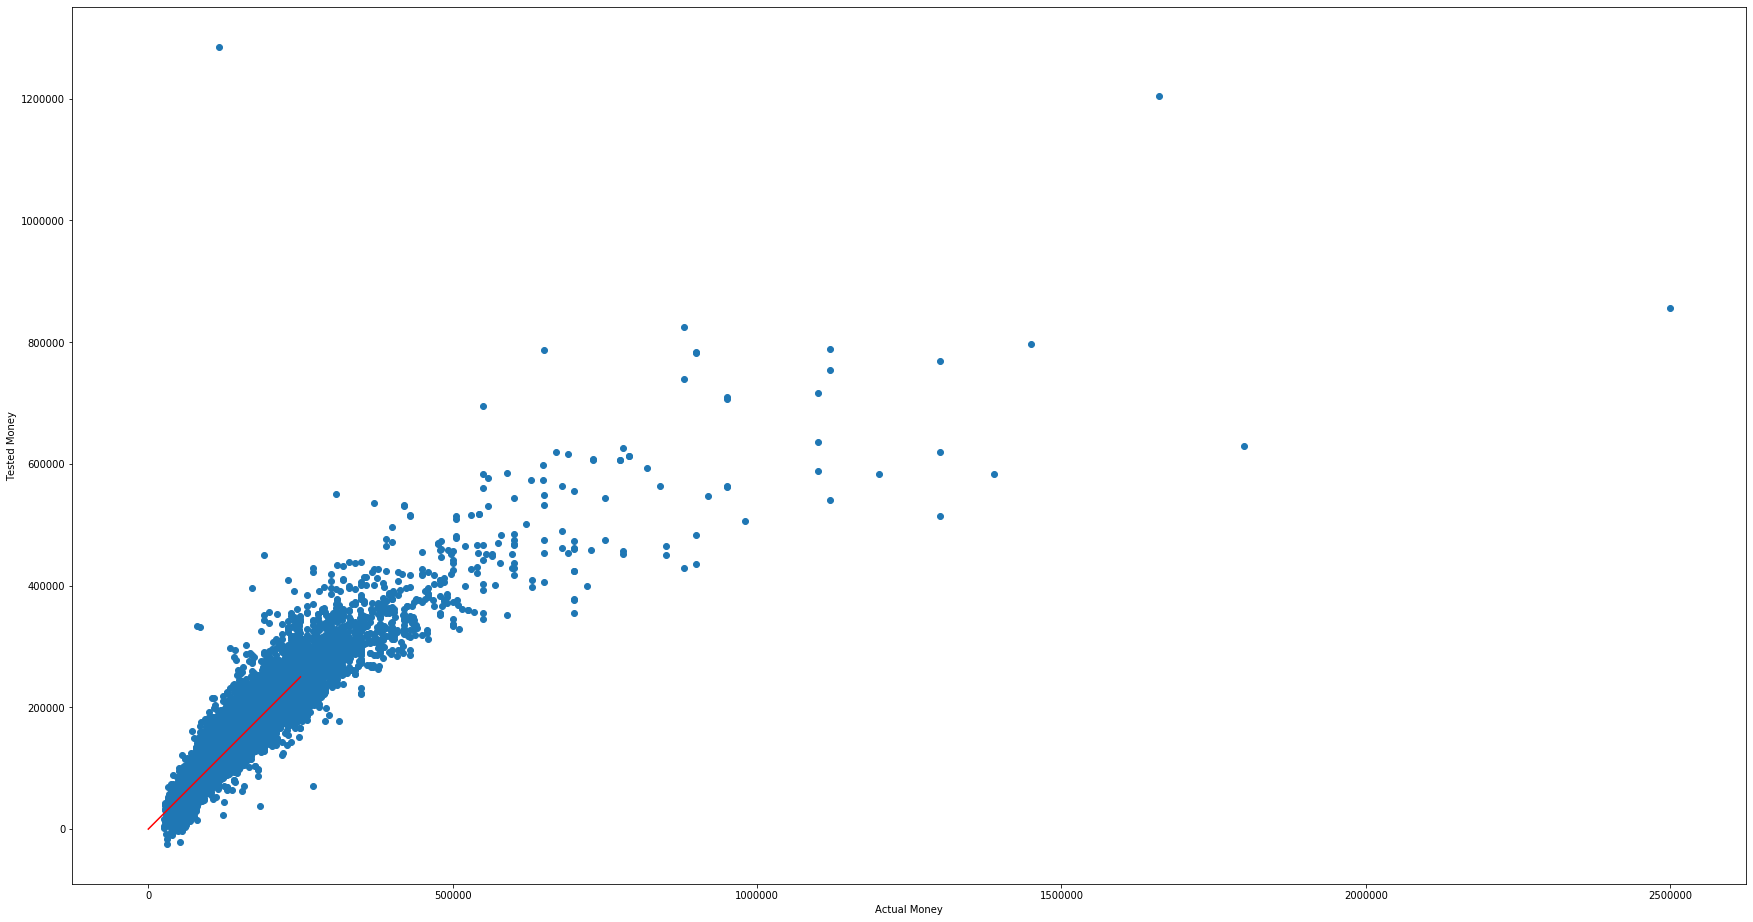

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 250000)
y=x
plt.plot(x,y,color="red")

In [35]:
rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  29898.53344380222


In [36]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

最寄駅名_鵜の木駅           3.086648e+11
最寄駅名_下丸子駅           3.309901e+11
間取り_2DK            -3.343743e+11
間取り_1DK            -3.350451e+11
間取り_2LDK           -3.832029e+11
最寄路線名_東武大師線         3.864534e+11
最寄駅名_沼部駅            3.964040e+11
最寄駅名_大師前駅          -3.982797e+11
最寄路線名_東北本線（宇都宮線）   -4.694829e+11
最寄駅名_武蔵新田駅          4.729681e+11
BSアンテナ              4.765270e+11
Unnamed: 49        -4.765270e+11
間取り_1LDK           -5.075858e+11
間取り_1R             -5.178126e+11
最寄路線名_日暮里・舎人ライナー   -5.566891e+11
最寄駅名_矢口渡駅           5.810905e+11
間取り_1K             -6.829064e+11
最寄路線名_高崎線          -8.351007e+11
最寄駅名_尾久駅            9.480807e+11
最寄路線名_東急多摩川線       -9.776134e+11
Name: Coef, dtype: float64

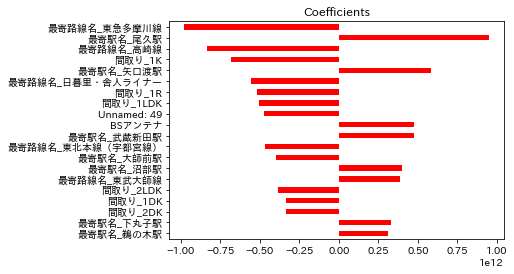

In [37]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

In [38]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\yk13525\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [39]:
import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\yk13525\\.matplotlib'

#学習データと予測データに分割(学習データ:予測データ=7:3)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df_train_x_std, df_train_y_std, test_size=0.3)

print(x_train_data)

#線形回帰モデルへ当てはめ
linreg.fit(x_train_data, y_train_data)

#予測実行
test_result = linreg.predict(x_test_data)

# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 1000)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

linreg_all = LinearRegression()

linreg_all.fit(df_train_x_std,df_train_y_std)

y_predict_result = linreg_all.predict(df_predict_x_std)

coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_predict_x.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

# 予測結果を逆標準化
df_predict_y.predict = y_predict_result * df_predict_y.std() + df_predict_y.mean()
y_predict_result_val = df_predict_y

plt.figure(figsize=(10,10))
plt.scatter(y_predict_result_val, df_predict_y.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_predict_result_val - df_predict_y.predict) ** 2) / len(y_predict_result_val))
print("RMSE = ", rmse)